클러스터링을 사용하여 해결하고자 하는 자신만의 문제를 정의
- 사이버 범죄 통계 현황을 시각화 하기. 디지털 문화가 발달하였으므로 사이버 범죄가 보다 많이 늘었음을 알 수 있을 것 같다.

데이터 선택
- 공공데이터포털에서 '경찰청_연도별 사이버 범죄 통계 현황' 데이터 이용
 사이버 범죄 특히 사이버 사기의 통계 현황을 시각화할 수 있을 것 같다.

In [2]:
# 데이터 시각화를 위해 seaborn 패키지 설치
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [4]:
#police.csv 데이터 추가 및 일부 데이터가 포함된 데이터프레임 로드

df = pd.read_csv('./police2.csv',encoding='cp949')
df.head()

,연도,구분,해킹(계정도용),해킹(단순침입),해킹(자료유출),해킹(자료훼손),서비스거부공격,악성프로그램(랜섬웨어),악성프로그램(기타),기타 정보통신망 침해형 범죄,...,사이버 음란물(일반음란물),사이버 음란물(아동음란물),사이버 음란물(불법촬영물유포),사이버 도박(스포츠토토),사이버 도박(경마 경륜 경정),사이버 도박(카지노),사이버 도박(기타),사이버 명예훼손(모욕),사이버 스토킹,기타 불법 컨텐츠
0,2020,발생건수,1067,1621,130,358,25,24,145,974,...,1366,2623,842.0,3222,332,429,1709,19388,42,204
1,2020,검거건수,117,217,46,168,10,0,81,272,...,987,2398,678.0,3154,315,382,1585,12638,39,126
2,2019,발생건수,751,1458,114,341,35,24,246,669,...,1769,756,165.0,3078,366,366,1536,16633,25,251
3,2019,검거건수,118,277,41,120,14,0,189,248,...,1436,589,139.0,3017,352,353,1440,11632,20,176
4,2018,발생건수,721,1003,114,340,20,33,86,571,...,2661,1172,NaN,1629,276,176,931,15926,60,208


In [5]:
# .info() 함수를 이용하여 데이터 df의 정보를 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   연도                14 non-null     int64  
 1   구분                14 non-null     object 
 2   해킹(계정도용)          14 non-null     int64  
 3   해킹(단순침입)          14 non-null     int64  
 4   해킹(자료유출)          14 non-null     int64  
 5   해킹(자료훼손)          14 non-null     int64  
 6   서비스거부공격           14 non-null     int64  
 7   악성프로그램(랜섬웨어)      14 non-null     int64  
 8   악성프로그램(기타)        14 non-null     int64  
 9   기타 정보통신망 침해형 범죄   14 non-null     int64  
 10  사이버사기(직거래)        14 non-null     int64  
 11  사이버사기(쇼핑몰)        14 non-null     int64  
 12  사이버사기(게임)         14 non-null     int64  
 13  사이버사기(이메일 무역사기)   14 non-null     int64  
 14  사이버사기(기타)         14 non-null     int64  
 15  사이버금융범죄(피싱)       14 non-null     int64  
 16  사이버금융범죄(파밍)       14 non-null     int64  
 17 

In [6]:
#중복 레코드 제거
df.drop_duplicates(inplace=True)
print(df.shape) #작업 확인용 출력

(14, 35)


In [7]:
df.head()

,연도,구분,해킹(계정도용),해킹(단순침입),해킹(자료유출),해킹(자료훼손),서비스거부공격,악성프로그램(랜섬웨어),악성프로그램(기타),기타 정보통신망 침해형 범죄,...,사이버 음란물(일반음란물),사이버 음란물(아동음란물),사이버 음란물(불법촬영물유포),사이버 도박(스포츠토토),사이버 도박(경마 경륜 경정),사이버 도박(카지노),사이버 도박(기타),사이버 명예훼손(모욕),사이버 스토킹,기타 불법 컨텐츠
0,2020,발생건수,1067,1621,130,358,25,24,145,974,...,1366,2623,842.0,3222,332,429,1709,19388,42,204
1,2020,검거건수,117,217,46,168,10,0,81,272,...,987,2398,678.0,3154,315,382,1585,12638,39,126
2,2019,발생건수,751,1458,114,341,35,24,246,669,...,1769,756,165.0,3078,366,366,1536,16633,25,251
3,2019,검거건수,118,277,41,120,14,0,189,248,...,1436,589,139.0,3017,352,353,1440,11632,20,176
4,2018,발생건수,721,1003,114,340,20,33,86,571,...,2661,1172,NaN,1629,276,176,931,15926,60,208


<Axes: xlabel='기타 불법 컨텐츠'>

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53433 (\N{HANGUL SYLLABLE KING}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: G

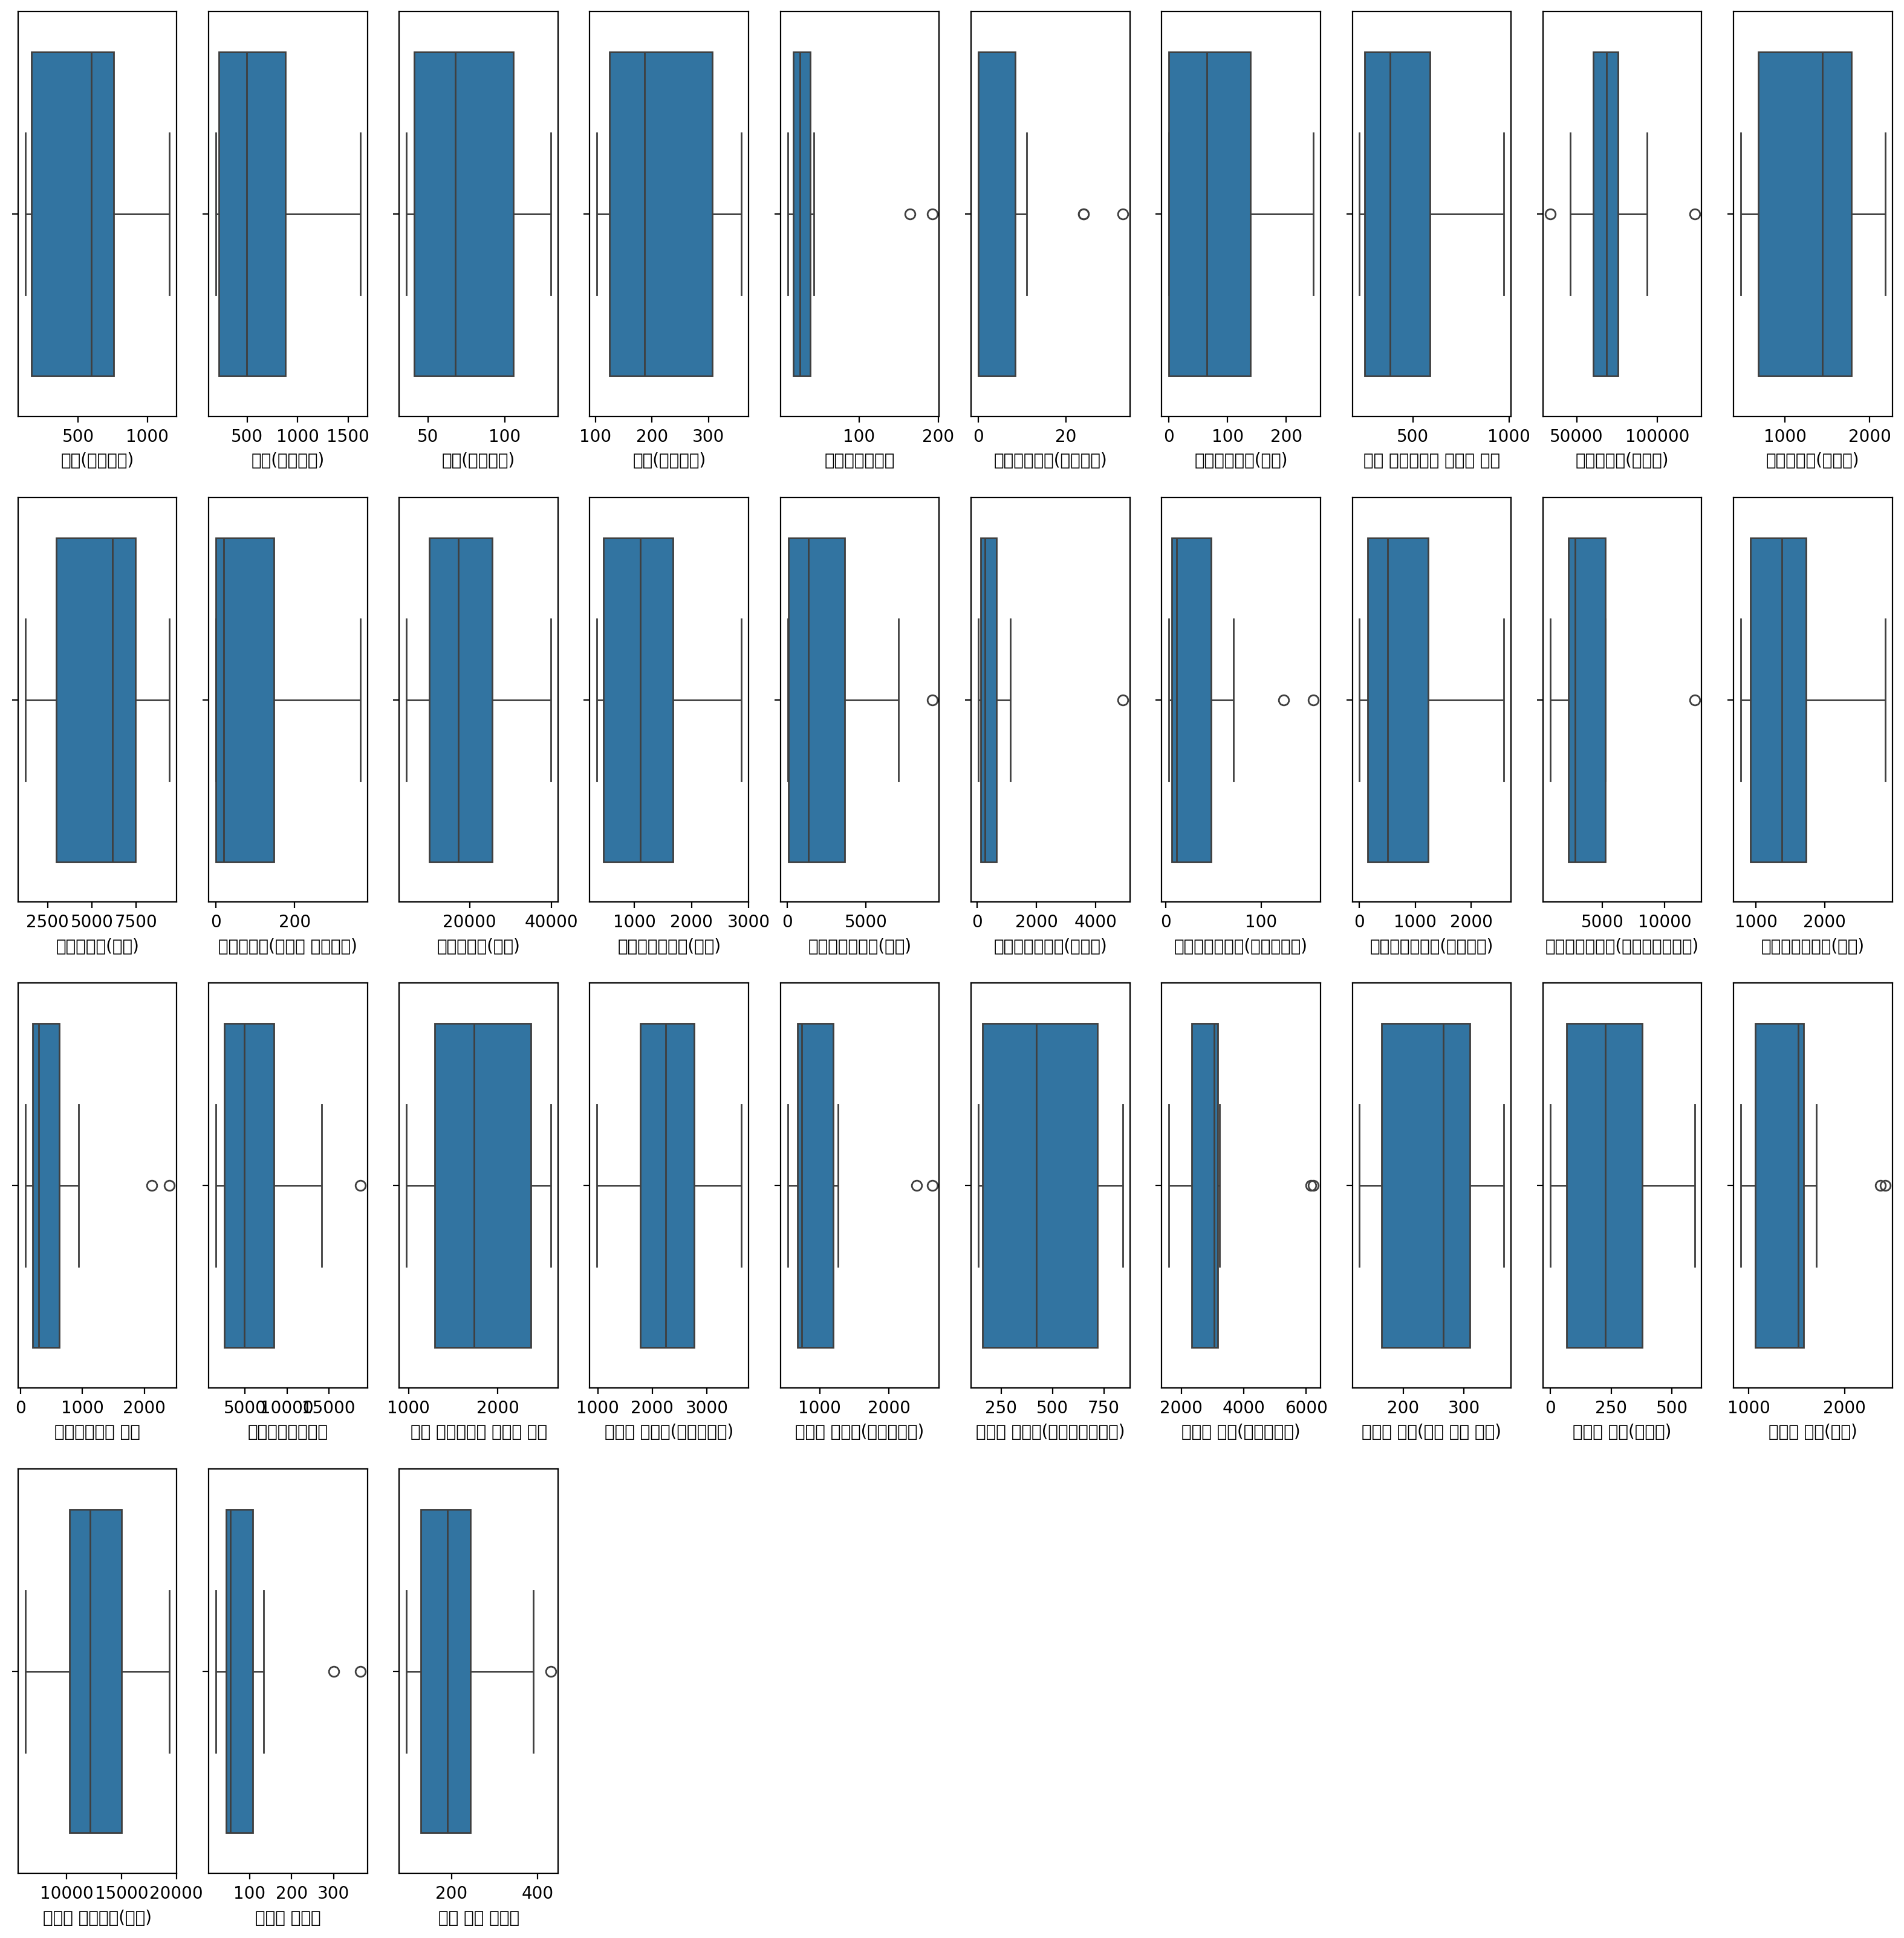

In [8]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,10,1)
sns.boxplot(x = '해킹(계정도용)', data = df)

plt.subplot(4,10,2)
sns.boxplot(x = '해킹(단순침입)', data = df)

plt.subplot(4,10,3)
sns.boxplot(x = '해킹(자료유출)', data = df)

plt.subplot(4,10,4)
sns.boxplot(x = '해킹(자료훼손)', data = df)

plt.subplot(4,10,5)
sns.boxplot(x = '서비스거부공격', data = df)

plt.subplot(4,10,6)
sns.boxplot(x = '악성프로그램(랜섬웨어)', data = df)

plt.subplot(4,10,7)
sns.boxplot(x = '악성프로그램(기타)', data = df)

plt.subplot(4,10,8)
sns.boxplot(x = '기타 정보통신망 침해형 범죄', data = df)

plt.subplot(4,10,9)
sns.boxplot(x = '사이버사기(직거래)', data = df)

plt.subplot(4,10,10)
sns.boxplot(x = '사이버사기(쇼핑몰)', data = df)

plt.subplot(4,10,11)
sns.boxplot(x = '사이버사기(게임)', data = df)

plt.subplot(4,10,12)
sns.boxplot(x = '사이버사기(이메일 무역사기)', data = df)

plt.subplot(4,10,13)
sns.boxplot(x = '사이버사기(기타)', data = df)

plt.subplot(4,10,14)
sns.boxplot(x = '사이버금융범죄(피싱)', data = df)

plt.subplot(4,10,15)
sns.boxplot(x = '사이버금융범죄(파밍)', data = df)

plt.subplot(4,10,16)
sns.boxplot(x = '사이버금융범죄(스미싱)', data = df)

plt.subplot(4,10,17)
sns.boxplot(x = '사이버금융범죄(메모리해킹)', data = df)

plt.subplot(4,10,18)
sns.boxplot(x = '사이버금융범죄(몸캠피싱)', data = df)

plt.subplot(4,10,19)
sns.boxplot(x = '사이버금융범죄(메신저이용사기)', data = df)

plt.subplot(4,10,20)
sns.boxplot(x = '사이버금융범죄(기타)', data = df)

plt.subplot(4,10,21)
sns.boxplot(x = '개인위치정보 침해', data = df)

plt.subplot(4,10,22)
sns.boxplot(x = '사이버저작권침해', data = df)

plt.subplot(4,10,23)
sns.boxplot(x = '기타 정보통신망 이용형 범죄', data = df)

plt.subplot(4,10,24)
sns.boxplot(x = '사이버 음란물(일반음란물)', data = df)

plt.subplot(4,10,25)
sns.boxplot(x = '사이버 음란물(아동음란물)', data = df)

plt.subplot(4,10,26)
sns.boxplot(x = '사이버 음란물(불법촬영물유포)', data = df)

plt.subplot(4,10,27)
sns.boxplot(x = '사이버 도박(스포츠토토)', data = df)

plt.subplot(4,10,28)
sns.boxplot(x = '사이버 도박(경마 경륜 경정)', data = df)

plt.subplot(4,10,29)
sns.boxplot(x = '사이버 도박(카지노)', data = df)

plt.subplot(4,10,30)
sns.boxplot(x = '사이버 도박(기타)', data = df)

plt.subplot(4,10,31)
sns.boxplot(x = '사이버 명예훼손(모욕)', data = df)

plt.subplot(4,10,32)
sns.boxplot(x = '사이버 스토킹', data = df)

plt.subplot(4,10,33)
sns.boxplot(x = '기타 불법 컨텐츠', data = df)

In [9]:
# 클러스팅에 사용할 열 선택 사이버사기(직거래)열을 숫자 데이터로 인코딩

from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df.loc[:, ('사이버사기(직거래)','사이버사기(쇼핑몰)','사이버사기(게임)','사이버사기(이메일 무역사기)','사이버사기(기타)')]

y = df['사이버사기(직거래)']

X['사이버사기(직거래)'] = le.fit_transform(X['사이버사기(직거래)'])

# X = scaler.fit_transform(X)

y = le.transform(y)



In [10]:

from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# 각 데이터 포인트에 대한 클러스터 예측

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [11]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5162017272354561

In [12]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

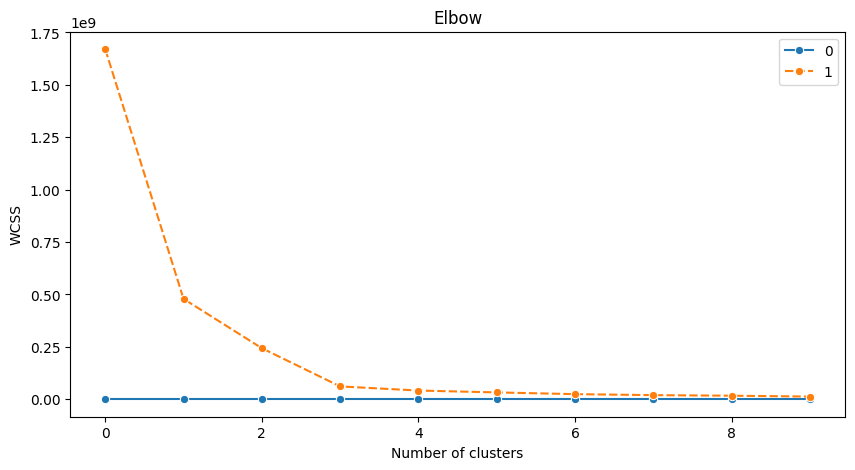

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

클러스터 분석:
클러스터 숫자 3.
클러스터의 산점도를 만듦.
가까이 모여있는 것을 알 수 있음.

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  fig.canvas.print_figure(

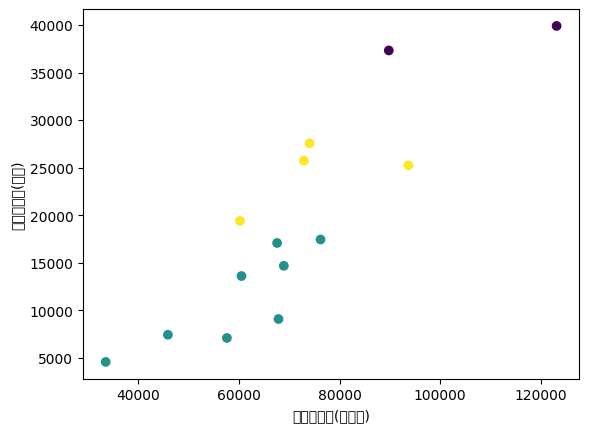

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['사이버사기(직거래)'],df['사이버사기(기타)'],c = labels)
plt.xlabel('사이버사기(직거래)')
plt.ylabel('사이버사기(기타)')
plt.show()

클러스터 시각화 : 60000~80000에 가장 많이 밀집된 것으로 보여진다

In [15]:
from sklearn.metrics import silhouette_score

# X_features_scaled: 특성이 스케일링된 데이터셋
# labels: 각 데이터 포인트가 속한 클러스터를 나타내는 레이블
silhouette_avg = silhouette_score(X, labels)

print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.5162017272354561


실루엣 점수 0.4844655407357537
실루엣 점수가 1에 가까울수록 클러스팅이 잘 된 것이다.
약 0.5이라 조금 아쉬운 결과인 것 같다.

In [16]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1 out of 14 samples were correctly labeled.
Accuracy score: 0.07


In [22]:
# 클러스터별 중심점 분석
cluster_centers = kmeans.cluster_centers_

# 각 클러스터의 특성을 설명
for i in range(len(cluster_centers)):
    print("Cluster", i+1, "특성:")
    print(cluster_centers[i])
    print("\n")

Cluster 1 특성:
[2.25000e+00 1.68425e+03 1.97600e+03 0.00000e+00 7.03275e+03]


Cluster 2 특성:
[1.10000000e+01 1.14266667e+03 8.72533333e+03 3.32000000e+02
 3.49310000e+04]


Cluster 3 특성:
[7.00000000e+00 1.14857143e+03 6.02728571e+03 3.97142857e+01
 1.90154286e+04]




클러스터 1:
해킹(계정도용): 약 2.25
해킹(단순침입): 약 1684.25
해킹(자료유출): 약 1976
해킹(자료훼손): 0
서비스거부공격: 약 7032.75
해킹(단순침입), 서비스거부공격 등의 침해 유형이 상대적으로 높지만 해킹(자료훼손)이 발생하지 않는 것으로 보인다.
클러스터 2:
해킹(계정도용): 약 11
해킹(단순침입): 약 1142.67
해킹(자료유출): 약 8725.33
해킹(자료훼손): 약 332
서비스거부공격: 약 34931
해킹(자료유출)과 서비스거부공격이 높은 것으로 보인다.
클러스터 3:
해킹(계정도용): 약 7
해킹(단순침입): 약 1148.57
해킹(자료유출): 약 6027.29
해킹(자료훼손): 약 39.71
서비스거부공격: 약 19015.43
해킹(자료훼손)과 서비스거부공격이 낮고, 해킹(단순침입)과 해킹(자료유출)이 상대적으로 높은 것으로 보인다.